In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cpu')

In [4]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [5]:
train_dataset = torchvision.datasets.MNIST(root='data',train = True,
                                          transform = transforms.ToTensor(),
                                          download = True)

In [6]:
test_dataset = torchvision.datasets.MNIST(root='data',train=False,
                                         transform = transforms.ToTensor(),
                                         download = True)

In [7]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle= True)

In [10]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [11]:
examples = iter(train_loader)

In [12]:
samples ,labels = examples.next()

In [13]:
samples.shape

torch.Size([100, 1, 28, 28])

In [14]:
labels.shape

torch.Size([100])

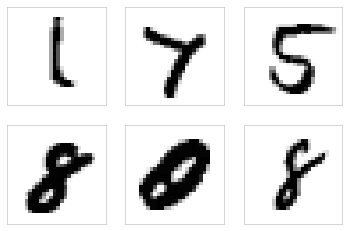

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i][0],cmap='gray_r')
plt.show()

In [16]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [17]:
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

In [18]:
print(model)

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)


In [19]:
#loss func^ & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [20]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        #forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},loss = {loss.item():.4f}')

epoch 1/20, step 100/600,loss = 0.5923
epoch 1/20, step 200/600,loss = 0.3614
epoch 1/20, step 300/600,loss = 0.2340
epoch 1/20, step 400/600,loss = 0.2904
epoch 1/20, step 500/600,loss = 0.2286
epoch 1/20, step 600/600,loss = 0.2238
epoch 2/20, step 100/600,loss = 0.1939
epoch 2/20, step 200/600,loss = 0.1948
epoch 2/20, step 300/600,loss = 0.1750
epoch 2/20, step 400/600,loss = 0.2894
epoch 2/20, step 500/600,loss = 0.2624
epoch 2/20, step 600/600,loss = 0.2862
epoch 3/20, step 100/600,loss = 0.1752
epoch 3/20, step 200/600,loss = 0.1257
epoch 3/20, step 300/600,loss = 0.1225
epoch 3/20, step 400/600,loss = 0.2663
epoch 3/20, step 500/600,loss = 0.0939
epoch 3/20, step 600/600,loss = 0.0899
epoch 4/20, step 100/600,loss = 0.1079
epoch 4/20, step 200/600,loss = 0.1177
epoch 4/20, step 300/600,loss = 0.0537
epoch 4/20, step 400/600,loss = 0.0710
epoch 4/20, step 500/600,loss = 0.0420
epoch 4/20, step 600/600,loss = 0.0357
epoch 5/20, step 100/600,loss = 0.0920
epoch 5/20, step 200/600,

In [21]:
# testing

In [22]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
    _, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions ==  labels).sum().item()
    acc = 100.0 * n_correct/n_samples
    print(f"accuracy = {acc}")

accuracy = 100.0


In [23]:
n_samples

100

In [24]:
n_correct

100